# The dataset

For this exercise, we are going to work with a classic dataset that is often used to teach machine learning.
It is so well-known that it has its own wikipedia page: https://en.wikipedia.org/wiki/Iris_flower_data_set
        
The data set consists of **50 samples** from each of three species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor).
**Four features** were measured from each sample: the length and the width of the sepals and petals, in centimetres. Sepals and petals are parts of a flower as you can see here:

<img src="img/Petal-sepal.jpg",width=200>

Because the dataset is so popular, it is directly provided by SciKit Learn and we can import it from there.

## Caveats
There are a number of things we do not do in this notebook - but that you should do for your coursework:
* Check if the dataset is imbalanced and treat it if necessary (e.g. by using a better performance metric and/or using over- or under-sampling)
* Treat missing values or incorrect values in your dataset
* Data normalisation / feature scaling. You can find more about these pre-processing steps here: http://scikit-learn.org/stable/modules/preprocessing.html
* If you want to test many different hyperparameters, this module may be helpful: GridSearchCV
  * http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
  * Examples of how to use it can be found in the link above as well
  * GridSearch Cross-Validation allows you to perform an exhaustive search on the hyperparameter space and find the best one

## Import statements

In [183]:
# Our usual suspects for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualisation
import matplotlib.pyplot as plt

# Import SciKit Learn algorithms that we will use further below
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.cluster import KMeans                  # K Means clustering
from sklearn.neighbors import KNeighborsClassifier  # K nearest neighbors
from sklearn import linear_model                    # Linear models like Linear Regression
from sklearn import svm

# Import SciKit Learn method to split data
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score # http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# Import the Iris dataset from SciKit Learn
from sklearn import datasets

In [184]:
iris = datasets.load_iris()

print(type(iris))

<class 'sklearn.datasets.base.Bunch'>


The iris dataset is in a special format and has already been split into the feature data and the target variable vector.

In [185]:
# This is the feature matrix
X = iris.data

print(type(X))
print(X.shape)
print (X)

<class 'numpy.ndarray'>
(150, 4)
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 

As you can see, the feature matrix is a NumPy array that we know how to work with.
The feature matrix contains the the length and the width of the sepals and petals, in centimetres, i.e. we have 4 features and, hence, 4 columns.

1. SepalLengthCm
1. SepalWidthCm
1. PetalLengthCm
1. PetalWidthCm

In [186]:
y = iris.target

print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The target data is just a column vector that tells us which type of iris this observation belongs to. The name has been coded, so we will find one of three values: 0, 1, or 2.

0=Setosa, 1=Versicolor, 2=Virginica

To be able to use column headers we import our NumPy arrays into Pandas and set the column headers manually. This way, we can print them when we display the data.

In [187]:
X_df = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y_df = pd.DataFrame(iris.target, columns=['Target'])

In [188]:
X_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [207]:
X_df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [189]:
y_df.head()

,Target
0,0
1,0
2,0
3,0
4,0


# Quick look at the data

## Looking at the feature data only (for didactic reasons)

Because we want to look at the data the way a clustering algorithm would see the data, let us only look at the feature dataset for now - and ignore the target vector.

We can print the data - but not in one single graph since we have 4 dimensions.

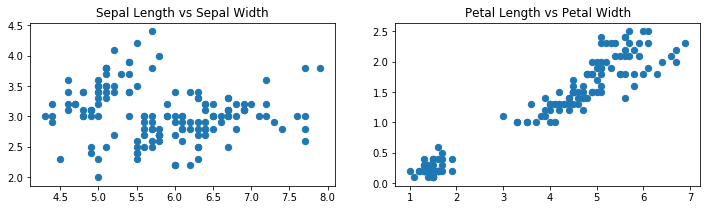

In [190]:
# REMINDER: Do NOT forget to use this line of code below. Otherwise, you won't see any graphs in your notebook!
# We need to add the following line to tell matplotlib to just plot the figure right into the notebook
%matplotlib inline

# Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Draw a Scatter plot for Sepal Length vs Sepal Width
# We want to arrange our plots into subplots (i.e. show plots next to each other)
# nrows=1, ncols=2, plot_number=1
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
plt.subplot(1, 2, 1)

# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
# s defines the size of the circles
plt.scatter(X_df['Sepal Length'], X_df['Sepal Width'], s=40)
plt.title('Sepal Length vs Sepal Width')

# nrows=1, ncols=2, plot_number=2
plt.subplot(1,2,2)
plt.scatter(X_df['Petal Length'], X_df['Petal Width'], s=40)
plt.title('Petal Length vs Petal Width')

plt.show()

So this is how the clustering algorithm "perceives" the data. Clustering is unsupervised learning and so the labels are not provided.

The clustering algorithm is often given the number of desired clusters.

Some observations:
* As you can see in the right image, Petal Length and Petal Width appear to be very useful to create at least two clusters of similar flowers. 
* We have a concentrated cluster with small petal length and width - and one cluster with longer petal length and width.
* The left image where we use Sepal Length and Sepal Width alone does not provide a clear idea of how to group our observations into different clusters. It looks like there might be a gap between data points in the upper left corner and all the other data points.

## Looking at all the data

Let us know have a look at the data in a way that we can actually see the correct class labels that are also provided.

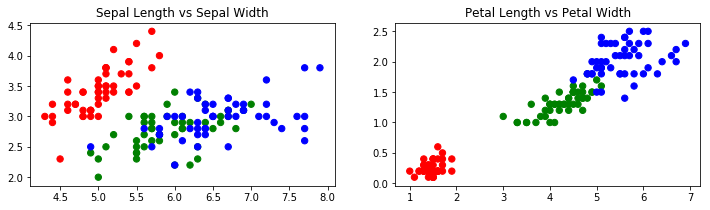

In [191]:
# Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species of Iris.
colours = np.array(['red', 'green', 'blue'])

#Draw a Scatter plot for Sepal Length vs Sepal Width
#nrows=1, ncols=2, plot_number=1
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
plt.subplot(1, 2, 1)

# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.scatter(X_df['Sepal Length'], X_df['Sepal Width'], c=colours[y_df['Target']], s=40)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1,2,2)
plt.scatter(X_df['Petal Length'], X_df['Petal Width'], c=colours[y_df['Target']], s=40)
plt.title('Petal Length vs Petal Width')

plt.show()

It looks like our observations from before were correct.

* The Iris species represented by the red circles can be easily distinguished purely by looking at the feature data
* However, the other two Iris species appear "mixed" and are harder to distinguish from one another

# Clustering

Let us only work with the feature data right now - and use it to apply some clustering techniques.

* In this case, we know that we should form 3 clusters. 
* In other clustering problems, you may have to try different cluster numbers and compare the results of your different models to find out which number of clusters produces the most homogeneous groups.

### K means

In [192]:
# Documentation of modulele: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Tutorial: http://scikit-learn.org/stable/modules/clustering.html#k-means

# Create a K means model with 3 clusters
kmeans_model = KMeans(n_clusters=3)

kmeans_model.fit(X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Within fractions of a second, the K means algorithm has created 3 clusters of the provided dataset.
Each observation in the feature dataset has been assigned a cluster ID which is stored in the variable labels_ of the K means model.

** The K Means model just randomly named the clusters 0, 1, 2. The K Means model obviously has no knowledge about the 0, 1, 2 classes used in the target vector.**
These may be the same conincidentally or may not. Since it is clustering, it does not assign class labels. It just groups data points.

In [193]:
print (kmeans_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


We can now compare how the K means clustered the dataset with the actual classes provided in the dataset:

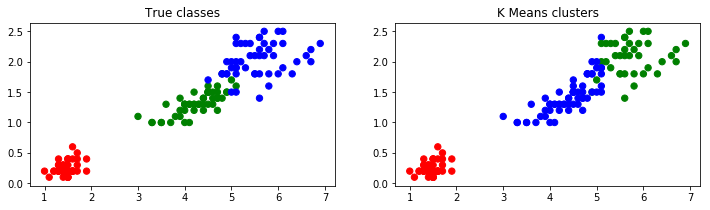

In [194]:
#Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colours = np.array(['red', 'green', 'blue'])

# Here, we apply some magic to make sure that we colour the data points the same way
# Because the clustering algorithm has no knowledge about any classes, the cluster IDs are just randomly assigned to clusters
# We reshuffle the IDs, so that they match our classes and the colours are identical for both figures
predicted_y = np.choose(kmeans_model.labels_, [1, 0, 2]).astype(np.int64)

# Plot the classifications that we saw earlier between Petal Length and Petal Width
plt.subplot(1, 2, 1)
plt.scatter(X_df['Petal Length'], X_df['Petal Width'], c=colours[y_df['Target']], s=40)
plt.title('True classes')
 
# Plot the classifications according to the model
plt.subplot(1, 2, 2)
plt.scatter(X_df['Petal Length'], X_df['Petal Width'], c=colours[predicted_y], s=40)
plt.title("K Means clusters")

plt.show()

As we can see, the K means clustering algorithm did a remarkable job. Most data points were correctly grouped into the three clusters.

K means is NOT a classification algorithm. But since we are given the labels in this case, we can calculate _how_ well K means performed compared to the true classes. We do so by using the metrics module and calculate some performance metrics based on the confusion matrix:

In [195]:
import sklearn.metrics as sm

sm.accuracy_score(y, predicted_y)

0.44

Roughly 90% of all data points have been correctly classified.

And we can also show the confusion matrix:

In [196]:
sm.confusion_matrix(y, predicted_y)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]])

Because we have 3 classes in this case, our confusion matrix is no longer a 2 x 2 matrix (as was the case in binary classification).
We are now dealing with a 3 x 3 matrix. The definition of accuracy, however, is still the same.

# Classification

## K nearest neighbors (KNN)

We can also apply K nearest neighbors to the same dataset.

In [197]:
# Because we want to actually test our model here,
# we need to split the data into training and test data

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Instantiate learning model (k = 100 to produce a deliberately terrible result)
knn = KNeighborsClassifier(n_neighbors=100)

# Fitting the model
knn.fit(X_train, y_train)

# Predict the response
pred = knn.predict(X_test)

# Evaluate accuracy
print (sm.accuracy_score(y_test, pred))

0.3


We have now created a KNN model where 100 neighbours vote on the label of a data point.
Obviously, this does not seem optimal. And if we play around with different numbers of neighbours we easily get much better performance.

So how could we automate that search?

### Parameter Tuning with Cross Validation

The number of neighbours that cast a vote is a so-called hyperparameter. It is a parameter that you have to choose before you train the model.

Finding the right hyperparameters is called hyperparameter tuning and can be done in a cross-validation phase.

In [198]:
# Create a list of number that you want go through as hyperparameter n_neighbors
list_of_odd_numbers_as_n_neighbors = []

# The parameters are: start, end, step size
for i in range(1, 50, 2):
    list_of_odd_numbers_as_n_neighbors.append(i)
    
print(list_of_odd_numbers_as_n_neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [199]:
# Empty list that will hold Cross-Validation scores
cv_scores = []

# perform 10-fold cross validation
for k in list_of_odd_numbers_as_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

What we have done now is the following:
1. We have created a list of odd numbers that we want to test as hyperparameter values
1. We than created a model for each of these hyperparameter values in a for-loop
  * We performed a 10-fold cross-validation for each model where we obtained the accuracy
  * We stored the average accuracy in a list
  
Now, we can print the error rate and see which hyperparameters perform best.

The optimal number of neighbors is 7


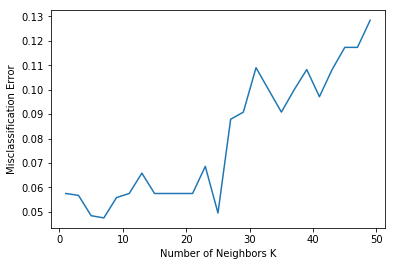

In [200]:
# Changing from Accuracy to error rate
list_of_error_rates = [1 - x for x in cv_scores]

# print(list_of_error_rates)

# determining best k
min_error = min(list_of_error_rates)
# print("Min error: " + str(min_error))

index_of_min_error = list_of_error_rates.index(min_error)
# print("Index_of_min_error: " + str(index_of_min_error))

# determining best k
optimal_k = list_of_odd_numbers_as_n_neighbors[index_of_min_error]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(list_of_odd_numbers_as_n_neighbors, list_of_error_rates)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Using Random Forest

In [201]:
# Import `RandomForestClassifier`
# You can read more about the parameters here: 
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# We split the data into test and training set
# We could just re-use the variables from above
# But we do it again here just to make sure we do not forget this step
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X_train, y_train)

# Now the model has been trained and you can print the feature importance
print(rfc.feature_importances_)

[ 0.11765552  0.03716382  0.44534465  0.39983601]


Interestingly, as we have seen before when we plotted the data, the first two features are not that useful for telling the species apart. The 3rd and the 4th feature (PetalLength and PetalWidth) appear to have much more predictive power.

And we can now apply the trained Random Forest model to the test data:

In [202]:
predicted_y_rfc = rfc.predict(X_test)

print(result)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


We obtained the predicted values and can now compare them with the actual values in y_test:

In [203]:
sm.accuracy_score(y_test, predicted_y_rfc)

0.97999999999999998

Roughly 98% of all data points could be classified correctly using a Random Forest Classifier.

## Using Logistic Regression

Even though logistic regression is an algorithm for binary classification, it can be applied to multi-class classification problems. The model then runs multiple times and distinguishes one class against all other classes.

In [204]:
# Instantiate the model (using the default parameters)
# The logistic regression can be found in the linear model
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logistic_reg = linear_model.LogisticRegression()

# We split the data into test and training set
# We could just re-use the variables from above
# But we do it again here just to make sure we do not forget this step
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fit the model with data
logistic_reg.fit(X_train, y_train)

# predict the response for new observations
predicted_y_log_reg = logistic_reg.predict(X_test)

And we can now compare predicted labels with the ones in our test dataset.

In [205]:
sm.accuracy_score(y_test, predicted_y_log_reg)

1.0

## Using Support Vector Classifier

We can also apply a Support Vector Classifier to the data.

* You can find an overview of Support Vector Machine algorithms in SciKit Learn here: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

The process of training an SVM is the same as before:

In [213]:
# Instantiate the model (using the default parameters)
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svm_classifier = svm.SVC()

print (svm_classifier)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


As you can see above, if we do not specify any parameters, SciKit Learn will just assume default values for each hyperparameter of the model.

You can read about each parameter here:
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Please pay attention to the kernel. The kernel defines what type of shapes the decision boundary can have. We will compare different kernels below.

In [214]:
# We split the data into test and training set
# We could just re-use the variables from above
# But we do it again here just to make sure we do not forget this step
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fit the model with data
svm_classifier.fit(X_train, y_train)

# predict the response for new observations
predicted_y_svm = svm_classifier.predict(X_test)

And we can now compare predicted labels with the ones in our test dataset.

In [215]:
sm.accuracy_score(y_test, predicted_y_svm)

1.0

### Plotting the decision boundaries for different kernels

You do NOT need to understand the code we use below.
This code is just to illustrate how the decision boundaries differ for different kernels we use for the SVC.

(Taken from: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)

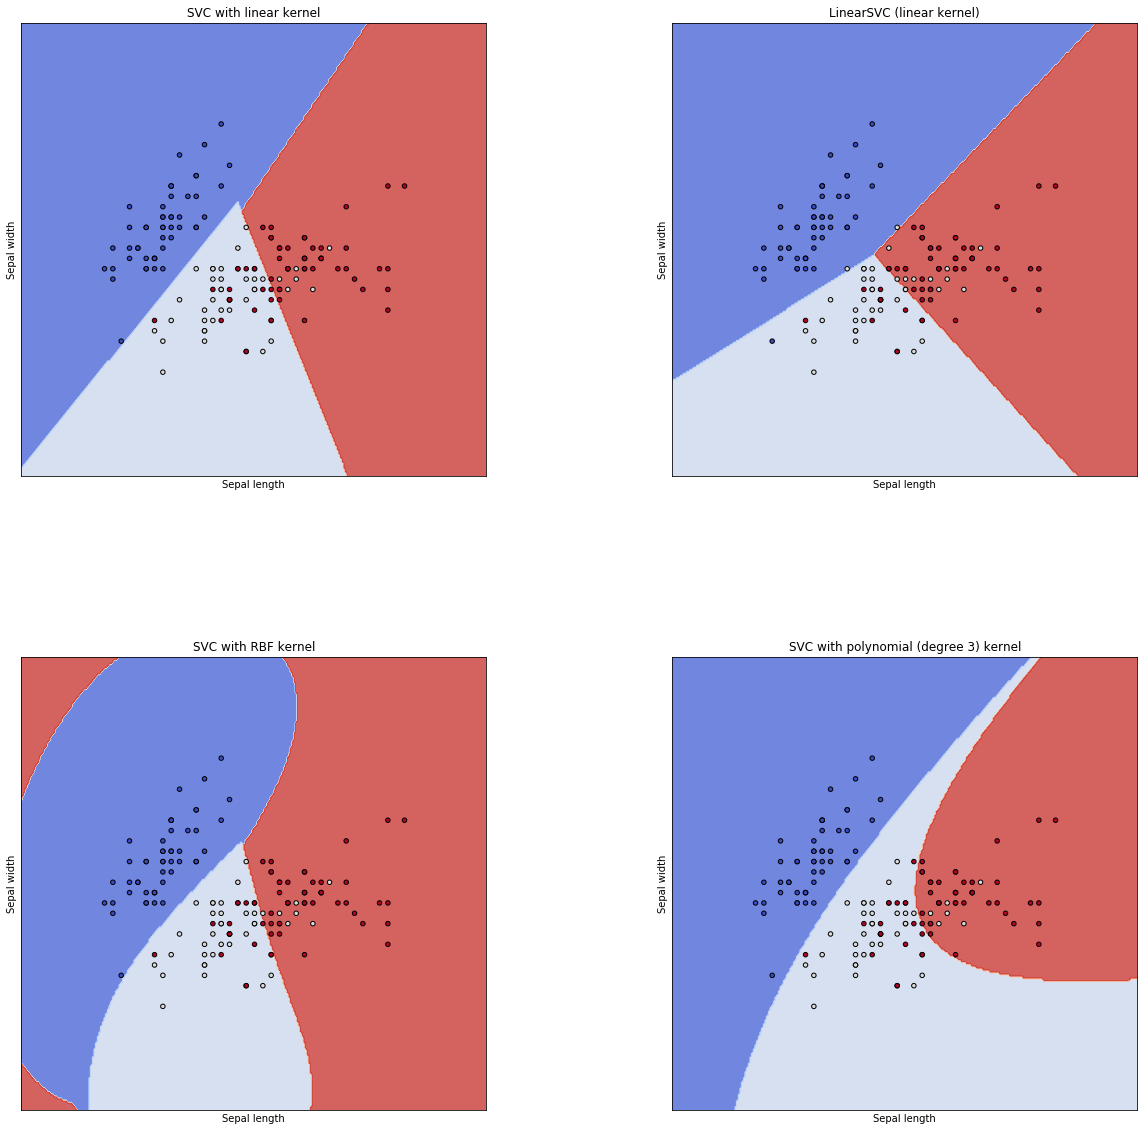

In [222]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()